# Loading the data

In [2]:
import pandas as pd

# Importing training data set
X_train=pd.read_csv('X_train.csv')
Y_train=pd.read_csv('Y_train.csv')
# Importing testing data set
X_test=pd.read_csv('X_test.csv')
Y_test=pd.read_csv('Y_test.csv')

print (X_train.head())

    Loan_ID Gender Married Dependents Education Self_Employed  \
0  LP001032   Male      No          0  Graduate            No   
1  LP001824   Male     Yes          1  Graduate            No   
2  LP002928   Male     Yes          0  Graduate            No   
3  LP001814   Male     Yes          2  Graduate            No   
4  LP002244   Male     Yes          0  Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             4950                0.0         125               360   
1             2882             1843.0         123               480   
2             3000             3416.0          56               180   
3             9703                0.0         112               360   
4             2333             2417.0         136               360   

   Credit_History Property_Area  
0               1         Urban  
1               1     Semiurban  
2               1     Semiurban  
3               1         Urban  
4           

In [4]:
#Handle missing values
import numpy as np

X_train = X_train.replace(4950,np.NaN) # create a missing value for the demo
from sklearn import preprocessing
imp=preprocessing.Imputer(missing_values='NaN', strategy='mean', axis=0)
X_train['ApplicantIncome']=imp.fit_transform(X_train[['ApplicantIncome']]).ravel()
print(X_train.head())

    Loan_ID Gender Married Dependents Education Self_Employed  \
0  LP001032   Male      No          0  Graduate            No   
1  LP001824   Male     Yes          1  Graduate            No   
2  LP002928   Male     Yes          0  Graduate            No   
3  LP001814   Male     Yes          2  Graduate            No   
4  LP002244   Male     Yes          0  Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0      5150.240209                0.0         125               360   
1      2882.000000             1843.0         123               480   
2      3000.000000             3416.0          56               180   
3      9703.000000                0.0         112               360   
4      2333.000000             2417.0         136               360   

   Credit_History Property_Area  
0               1         Urban  
1               1     Semiurban  
2               1     Semiurban  
3               1         Urban  
4           

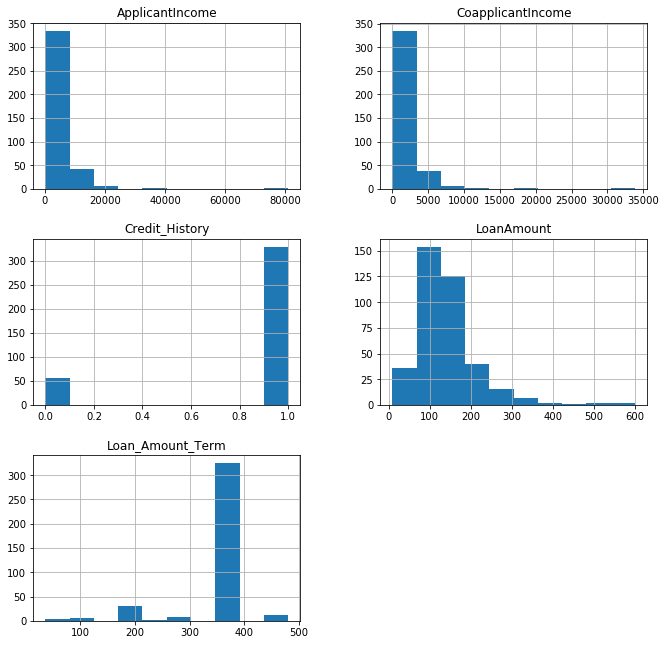

In [5]:
#Plotting the features
import matplotlib.pyplot as plt
X_train[X_train.dtypes[(X_train.dtypes=="float64")|(X_train.dtypes=="int64")].index.values].hist(figsize=[11,11])
plt.draw()
plt.show()

In [6]:
# Pairplots correlation to observe the distribution of data from one feature to the other (only continuous features)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df2 = X_train.corr(method='spearman')
def f(x):
    if (x>-0.5 and x<0.5):
        return " "
    else:
        return x

print(df2.applymap(lambda x:  f(x)))

                  ApplicantIncome CoapplicantIncome LoanAmount Loan_Amount_Term Credit_History
ApplicantIncome                 1                     0.548116                                
CoapplicantIncome                                 1                                           
LoanAmount               0.548116                            1                                
Loan_Amount_Term                                                              1               
Credit_History                                                                               1


# 1-Initializing and Fitting a k-NN model

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train[['ApplicantIncome', 'CoapplicantIncome','LoanAmount', 'Loan_Amount_Term', 'Credit_History']], Y_train)
# Checking the performance of our model on the testing data set
from sklearn.metrics import accuracy_score
print("1", accuracy_score(Y_test,knn.predict(X_test[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])))

1 0.614583333333


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


# 2-Just guessing might do better

In [8]:
print("2", Y_train.Target.value_counts() / Y_train.Target.count())
print ("2", Y_test.Target.value_counts()/Y_test.Target.count())

2 Y    0.705729
N    0.294271
Name: Target, dtype: float64
2 Y    0.635417
N    0.364583
Name: Target, dtype: float64


# 3-Importing MinMaxScaler and initializing it

In [10]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
# Scaling down both train and test data set
X_train_minmax=min_max.fit_transform(X_train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
X_test_minmax=min_max.fit_transform(X_test[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])

print (X_train_minmax)

# Fitting k-NN on our scaled data set
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_minmax,Y_train)
# Checking the model's accuracy
print("3", accuracy_score(Y_test,knn.predict(X_test_minmax)))

[[ 0.06184589  0.          0.1962775   0.72972973  1.        ]
 [ 0.03379097  0.054467    0.1928934   1.          1.        ]
 [ 0.03525046  0.10095458  0.07952623  0.32432432  1.        ]
 ..., 
 [ 0.07140383  0.06070278  0.34179357  0.72972973  1.        ]
 [ 0.03489177  0.08248367  0.2284264   0.72972973  1.        ]
 [ 0.05482993  0.16623814  0.41624365  0.72972973  1.        ]]
3 0.75


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


# 4-Standardizing the train and test data

In [11]:
from sklearn.preprocessing import scale
X_train_scale=scale(X_train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
X_test_scale=scale(X_test[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])

# Fitting k-NN on our normalized data set
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scale,Y_train)
# Checking the model's accuracy
print("4", accuracy_score(Y_test,knn.predict(X_test_scale)))

4 0.71875


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


# 5-Handling categorical data and combining results with scaler

In [ ]:
print(type(X_test_minmax))

In [12]:
# Importing LabelEncoder and initializing it
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
import numpy as np

# Importing training data set
X_train=pd.read_csv('X_train.csv')
Y_train=pd.read_csv('Y_train.csv')
# Importing testing data set
X_test=pd.read_csv('X_test.csv')
Y_test=pd.read_csv('Y_test.csv')

le=LabelEncoder()
# Iterating over all the common columns in train and test
for col in X_test.columns.values:
       # Encoding only categorical variables
       if X_test[col].dtypes=='object':
           # Using whole data to form an exhaustive list of levels
           data=X_train[col].append(X_test[col])
           le.fit(data.values)
           X_train[col]=le.transform(X_train[col])
           X_test[col]=le.transform(X_test[col])
print(X_train.head())
X_train_scale=scale(X_train)
X_test_scale=scale(X_test)
#np.delete(X_train_scale, 0, 1)
#np.delete(X_test_scale, 0, 1)
# Fitting k-NN on our normalized data set
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scale,Y_train)
# Checking the model's accuracy
print("5", accuracy_score(Y_test,knn.predict(X_test_scale)))

   Loan_ID  Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  Property_Area
0       13       1        0           0          0              0             4950                0.0         125               360               1              2
1      193       1        1           1          0              0             2882             1843.0         123               480               1              1
2      461       1        1           0          0              0             3000             3416.0          56               180               1              1
3      191       1        1           2          0              0             9703                0.0         112               360               1              2
4      300       1        1           0          0              0             2333             2417.0         136               360               1              2
5 0.760416666667


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


# 6-Using One Hot Encoding

One-Hot Encoding transforms each categorical feature with n possible values into n binary features, with only one active.

In [ ]:
# One-hot encoding for handling categorical data: Gender', 'Married', 'Dependents', 'Education','Self_Employed',
# Credit_History', 'Property_Area'
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import pdb

# Importing training data set
X_train=pd.read_csv('X_train.csv')
Y_train=pd.read_csv('Y_train.csv')
# Importing testing data set
X_test=pd.read_csv('X_test.csv')
Y_test=pd.read_csv('Y_test.csv')
# Why are we looking only from the second column on?
X_train = X_train.iloc[:,1:]
X_test = X_test.iloc[:,1:]
pdb.set_trace()

min_max=MinMaxScaler()
# Scaling down both train and test data set
X_train_minmax=min_max.fit_transform(X_train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
X_test_minmax=min_max.fit_transform(X_test[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])

enc=OneHotEncoder(sparse=False)
X_train_1=pd.DataFrame(X_train_minmax, columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'])
X_test_1=pd.DataFrame(X_test_minmax, columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'])

columns=['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Credit_History', 'Property_Area']
for col in columns:
    
       # creating an exhaustive list of all possible categorical values
       data=X_train[[col]].append(X_test[[col]])
       #pdb.set_trace()  # try using 'n', or 'q'
       #we need to first transform all strings to integers
       le = LabelEncoder()
       le.fit(data[col])
       data[col] = le.transform(data[col])
       X_train[col] = le.transform(X_train[col])
       X_test[col] = le.transform(X_test[col])
       enc.fit(data)
    
       # Fitting One Hot Encoding on train data
       temp = enc.transform(X_train[[col]])
       # Changing the encoded features into a data frame with new column names
       temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in data[col].value_counts().index])
       # In side by side concatenation index values should be same
       # Setting the index values similar to the X_train data frame
       temp=temp.set_index(X_train.index.values)
       # adding the new One Hot Encoded variables to the train data frame
       X_train_1=pd.concat([X_train_1,temp],axis=1)
        
       # fitting One Hot Encoding on test data
       temp = enc.transform(X_test[[col]])
       # changing it into data frame and adding column names
       temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in data[col].value_counts().index])
       # Setting the index for proper concatenation
       temp=temp.set_index(X_test.index.values)
       # adding the new One Hot Encoded varibales to test data frame
       X_test_1=pd.concat([X_test_1,temp],axis=1)

print(X_train_1.head())
# Fitting k-NN on our normalized data set
#model=KNeighborsClassifier(n_neighbors=5)
model=LogisticRegression(penalty='l2',C=1)
model.fit(X_train_1,Y_train)
# Checking the model's accuracy
print("5", accuracy_score(Y_test,model.predict(X_test_1)))

--Return--
> <ipython-input-14-92d21f33554a>(20)<module>()->None
-> pdb.set_trace()
(Pdb) X_train
     Gender Married Dependents     Education Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History Property_Area
0      Male      No          0      Graduate            No             4950           0.000000         125               360               1         Urban
1      Male     Yes          1      Graduate            No             2882        1843.000000         123               480               1     Semiurban
2      Male     Yes          0      Graduate            No             3000        3416.000000          56               180               1     Semiurban
3      Male     Yes          2      Graduate            No             9703           0.000000         112               360               1         Urban
4      Male     Yes          0      Graduate            No             2333        2417.000000         136               360   

The accuracy is still the same as we got with K-NN from numeric features. This means categorical features we added are not very significant in our objective function.

Try using approach from:
    https://stackoverflow.com/questions/40336502/want-to-know-the-diff-among-pd-factorize-pd-get-dummies-sklearn-preprocessing